## Generowanie plików pythonowych na podstawie notebooków

In [1]:
!jupyter nbconvert --to script copy_files.ipynb
!jupyter nbconvert --to script preprocessing.ipynb
!jupyter nbconvert --to script classic_segmentation.ipynb
!jupyter nbconvert --to script data_cleaning_and_preprocessing.ipynb
!jupyter nbconvert --to script resize_img.ipynb
!jupyter nbconvert --to script split_data.ipynb

[NbConvertApp] Converting notebook copy_files.ipynb to script
[NbConvertApp] Writing 2858 bytes to copy_files.py
[NbConvertApp] Converting notebook preprocessing.ipynb to script
[NbConvertApp] Writing 2172 bytes to preprocessing.py
[NbConvertApp] Converting notebook classic_segmentation.ipynb to script
[NbConvertApp] Writing 1318 bytes to classic_segmentation.py
[NbConvertApp] Converting notebook data_cleaning_and_preprocessing.ipynb to script
[NbConvertApp] Writing 4149 bytes to data_cleaning_and_preprocessing.py
[NbConvertApp] Converting notebook resize_img.ipynb to script
[NbConvertApp] Writing 2959 bytes to resize_img.py
[NbConvertApp] Converting notebook split_data.ipynb to script
[NbConvertApp] Writing 2126 bytes to split_data.py


## Importowanie potrzebnych funkcji i bibliotek

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
Braki:
 lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Duplikaty: 0
Duplikaty pełnych wierszy: 0


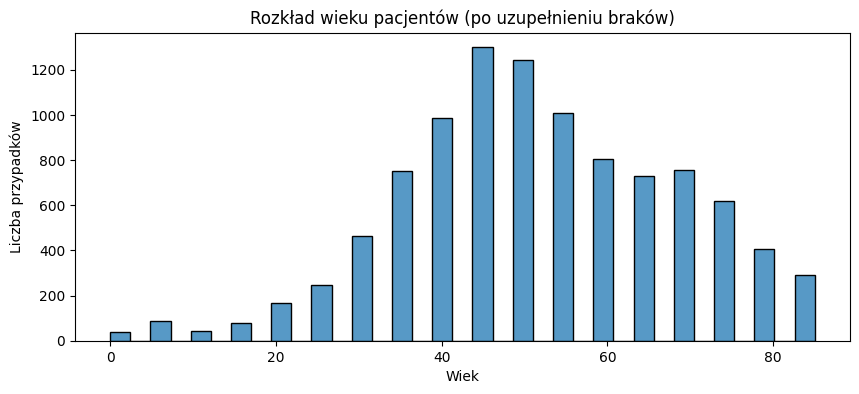

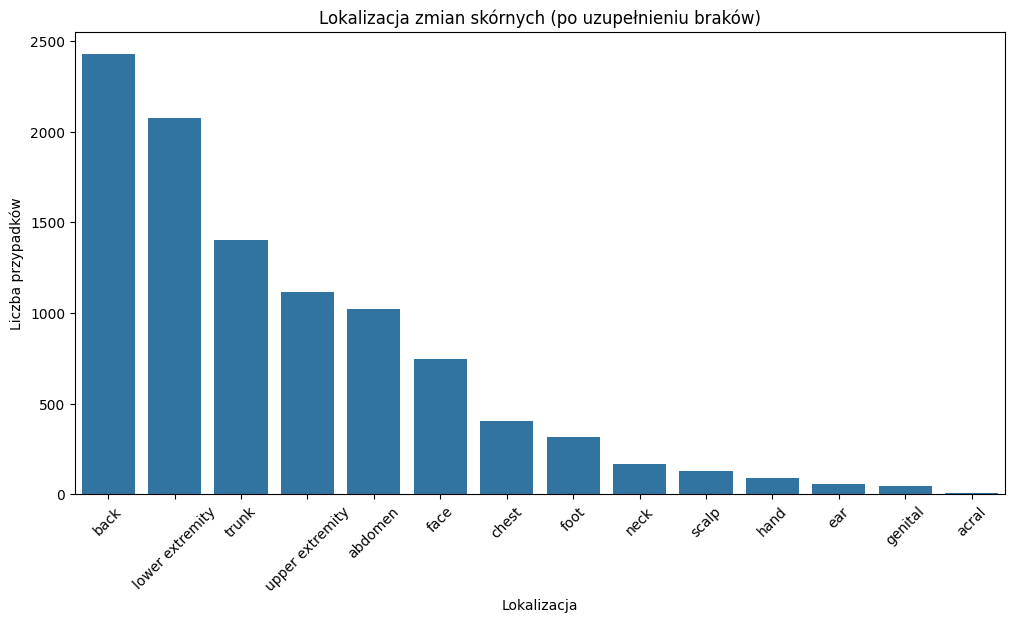

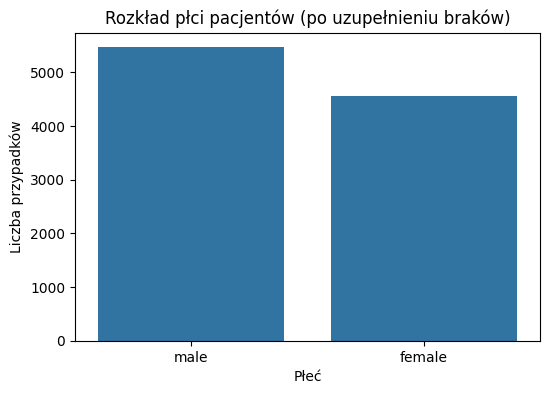

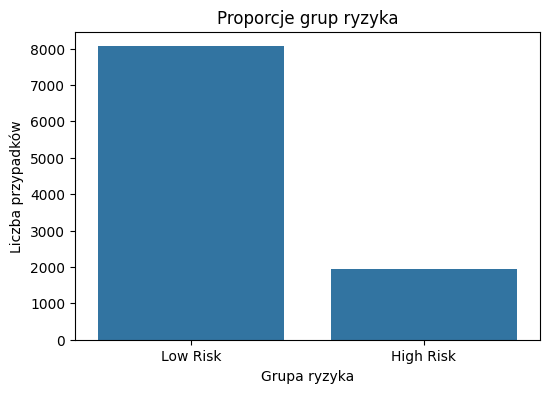

In [2]:
from pathlib import Path
from copy_files import process_copy
from preprocessing import preprocess_folders
from classic_segmentation import segment_folder
from data_cleaning_and_preprocessing import process_metadata
from resize_img import process_resize
from split_data import run_data_split

## Przeprowadzenie czyszczenia i uzupełniania danych

In [3]:
input_csv  = Path("./data/raw/HAM10000_metadata.csv")
output_csv = Path("./data/processed/HAM10000_metadata_clean.csv")
df = process_metadata(input_csv, output_csv, show_steps=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
Braki:
 lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Duplikaty: 0
Duplikaty pełnych wierszy: 0


## Przeprowadzenia oczyszczania zdjęć (preprocessing)


In [4]:
input_dirs = ['data/raw/HAM10000_images_part_1', 'data/raw/HAM10000_images_part_2']
preprocess_folders(input_dirs, 'data/processed/images')

## Przeprowadzenie klasycznej segmentacji

In [5]:
segment_folder('data/processed/images', 'data/processed/masks_classic')

## Przeprowadznie kopiowania zdjęć których maski są przystępne do wykorzystania w teningu sieci U-Net

In [6]:
process_copy(Path("./data/processed/images"), Path("./data/processed/masks_classic"),
             Path("./correct_masks.csv"), Path("./data/processed/images_to_train"), "")

Skopiowano 6663 plików z `images` do `data\processed\images_to_train\images`
Skopiowano 6663 plików z `masks_classic` do `data\processed\images_to_train\masks`
Foldery są spójne.
Podsumowanie: `images`=6663, `masks`=6663


## Przeprowadzenie operacji dostosowania rozmiaru zdjęć

In [7]:
process_resize(Path("./data/processed/images_to_train/images"), Path("./data/processed/images_to_train/masks"),
               Path("./data/processed/resized/u-net/images"), Path("./data/processed/resized/u-net/masks"), (256, 256))

Znaleziono 6663 zdjęć i 6663 masek.
Zakończono przetwarzanie


## Przeprowadzenie podziału danych na zbiór teningowy i testowy i zapisanie danych do plików .csv

In [ ]:
run_data_split(Path("./correct_masks.csv"), Path("./data/processed/images_to_train/u-net"), 0.10, 42)

Zapisano train.csv i test.csv w data\processed\images_to_train
Wierszy: train=6003, test=660


## Skopiowanie zdjęć zawartych w pliku test.csv do folderu test 

In [ ]:
process_copy(Path("./data/processed/resized/u-net/images"), Path("./data/processed/resized/u-net/masks"),
             Path("./data/processed/images_to_train/u-net/test.csv"), Path("./data/processed/images_to_train/u-net"), "test")

Skopiowano 660 plików z `images` do `data\processed\images_to_train\test\images`
Skopiowano 660 plików z `masks` do `data\processed\images_to_train\test\masks`
Foldery są spójne.
Podsumowanie: `images`=660, `masks`=660


## Skopiowanie zdjęć zawartych w pliku train.csv do folderu train 

In [ ]:
process_copy(Path("./data/processed/resized/u-net/images"), Path("./data/processed/resized/u-net/masks"),
             Path("./data/processed/images_to_train/u-net/train.csv"), Path("./data/processed/images_to_train/u-net"), "train")

Skopiowano 6003 plików z `images` do `data\processed\images_to_train\train\images`
Skopiowano 6003 plików z `masks` do `data\processed\images_to_train\train\masks`
Foldery są spójne.
Podsumowanie: `images`=6003, `masks`=6003
